#  PHYSICAL MODELS OF LIVING SYSTEMS

## Homework - week 6


Author: Nguyen Xuan Tung

Id: 2005491
    

----------------------------------------------------------------------------------------------------------

Consider a consumer resource model with supply rate is s(c) = w c (1 – c/K) and resource concentration r(c) = c is linear for S=5 species and R=5 resources. Assign the metabolic strategies at random from a Uniform Distribution between [0, 0.2], while set all other parameters to 1 and choose the death rate small enough as you prefer.  

1.Perform the simulations of the full CRM model and compare the stationary solution you find numerically with those obtained analytically.

2.Set w=10 and do the simulation of the quasi stationary approximation (finding first c* and then simulating n(t,c*)) and compare it with the simulations of the full CRM (keeping fix the metabolic strategies in the two cases for a given realization). Do several (e.g. >20) realizations of the dynamics to obtain a statistics of the species population stationary states in the two cases, represent each population through a Box-Whisker Plot both for the full CRM and the GLV and compare the two.

3.Does the quasi-stationary approximation work if w = 0.1? Why?


----------------------------------------------------------------------------------------

We want to simulate the Consumer-Resource Model:

$$\begin{align*}
    \frac{dn_{\sigma}}{dt} &= n_{\sigma} (\sum_{i=1} v_{i} \alpha_{\sigma i} c_i - \delta) \\
    \frac{dc_i}{dt} &= \omega c_{i} (1-c_{i}) - \sum_{\sigma = 1} n_{\sigma} \alpha_{\sigma i} c_{i} \\
    \frac{dv_i}{dt} &= v_i( k_{\alpha} - v_i - \sum_a \alpha_{\sigma i} c_i)
\end{align*}$$



In [1]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cvxpy as cvx

In [2]:
def consumer_resource(t, state):
        X = state[:top_species]
        N = state[top_species:top_species+middle_species]
        R = state[top_species+middle_species:]
        
        dX = X*(np.dot(D,N)-u)
        dN = N*(np.dot(C,R)-m-np.dot(D.T,X))
        dR = R*(k-R-np.dot(C.T,N))
        
        return np.concatenate((dX,dN,dR),axis=None)

In [3]:
# Set the number of species/variants in each layer
top_species = 5
middle_species = 5
resources = 5
death_rate = 1e-10
w = 1

# Set the statistics for the consumer-preference matrices
D_mean = 1
D_std_dev = 1

C_mean = 1
C_std_dev = 1

# Create the matrices and vectors featured in the differential equations

D = D_mean/middle_species + D_std_dev*np.random.normal(0, 1, (top_species,middle_species))/np.sqrt(middle_species)
C = C_mean/resources+C_std_dev*np.random.normal(0, 1, (middle_species,resources))/np.sqrt(resources)

u = np.random.uniform(0.5,1.5,top_species)
m = np.random.uniform(0.5,1.5,middle_species)
k = np.random.uniform(0.5,1.5,resources)

# This vector contains the information about X, N, and R by creating a long vector:
# (X, N, R)
initial_state = np.random.uniform(0,0.2,top_species+middle_species+resources)
# initial_state = np.ones(top_species+middle_species+resources)


# simulate time evolution
sol = solve_ivp(consumer_resource, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))

C:\Users\ADMIN\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


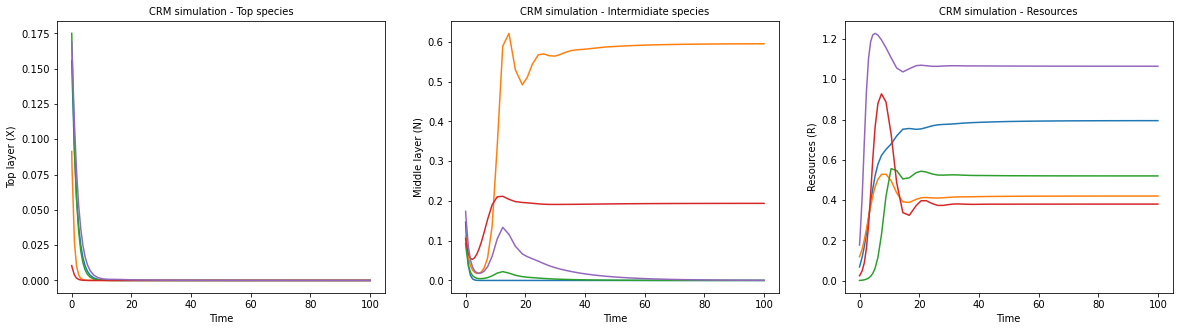

In [4]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

axs[0].plot(sol.t, sol.y[:top_species].T)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Top layer (X)')
axs[0].set_title("CRM simulation - Top species", fontsize=10)

axs[1].plot(sol.t, sol.y[top_species:top_species+middle_species].T)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Middle layer (N)')
axs[1].set_title("CRM simulation - Intermidiate species", fontsize=10)

axs[2].plot(sol.t, sol.y[top_species+middle_species:].T)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Resources (R)')
axs[2].set_title("CRM simulation - Resources", fontsize=10)

plt.show()

Stationary solutions:
    
By setting $\frac{dn_{\sigma}}{dt}=0$ and $\frac{dc_i}{dt}=0 $. So the solution: 

$$\begin{align*}
    \sum_{i=1} \alpha_{\sigma i} c_i^{*} &= \delta \\
     1 - \frac{1}{\omega}  \sum n_{\gamma}^{*} \alpha_{\gamma i} &= c_{i}^{*} 
\end{align*}$$


----------------------------------------------------------------------------------------------------------

#### Quasi-Static Approximation (QSA)

By setting $\frac{dc_i}{dt}=0 $, we get:

$$ c_{i}^{*} =  1 - \frac{1}{\omega}  \sum n_{\gamma}(t) \alpha_{\gamma i}    $$

so $n_{\sigma}$ becomes: 

$$ \frac{dn_{\sigma}}{dt} = n_{\sigma}(t) ( \sum_{i=1} \alpha_{\sigma i}  c_{i}^{*} - \delta ) $$



In [5]:
def quasi_static(t, state):
        X = state[:top_species]
        N = state[top_species:top_species+middle_species]
        R = state[top_species+middle_species:]
        
        dX = X*(np.dot(D,N)-u)
        dN = N*(np.dot(C.T,R)-m)
        dR = R*(k-R-np.dot(C,N))
        
        return np.concatenate((dX,dN,dR),axis=None)

Set w = 10, simulation of CMR and QSA

In [6]:
# Set the number of species/variants in each layer
top_species = 5
middle_species = 5
resources = 5
death_rate = 1e-10
w = 10

# Set the statistics for the consumer-preference matrices
D_mean = 1
D_std_dev = 1

C_mean = 1
C_std_dev = 1

# Create the matrices and vectors featured in the differential equations

D = D_mean/middle_species + D_std_dev*np.random.normal(0, 1, (top_species,middle_species))/np.sqrt(middle_species)
C = C_mean/resources+C_std_dev*np.random.normal(0, 1, (middle_species,resources))/np.sqrt(resources)

u = np.random.uniform(0.5,1.5,top_species)
m = np.random.uniform(0.5,1.5,middle_species)
k = np.random.uniform(0.5,1.5,resources)

# This vector contains the information about X, N, and R by creating a long vector:
# (X, N, R)
initial_state = np.random.uniform(0,0.2,top_species+middle_species+resources)
# initial_state = np.ones(top_species+middle_species+resources)


# simulate time evolution
sol_CRM = solve_ivp(consumer_resource, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))
sol_QSA = solve_ivp(quasi_static, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))

C:\Users\ADMIN\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


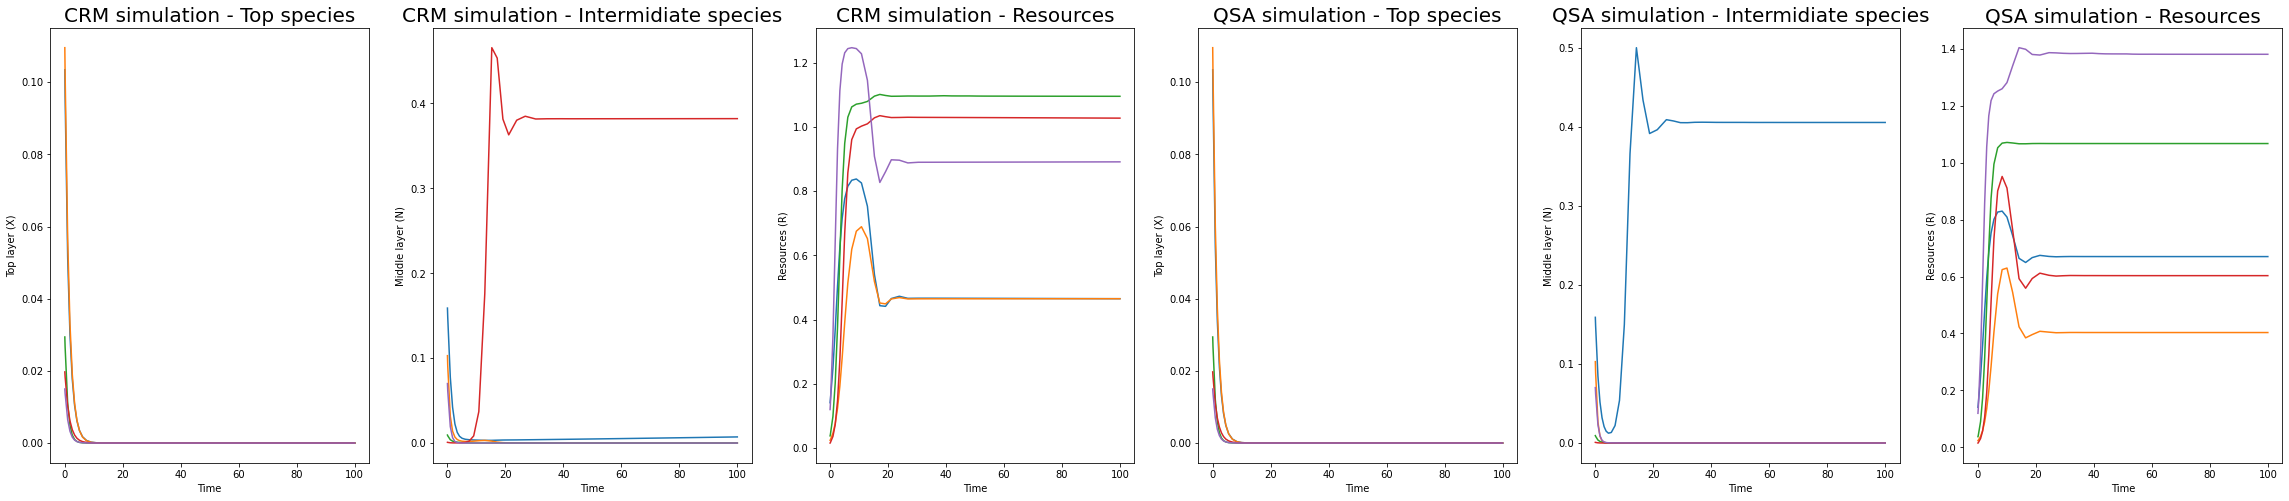

In [7]:
fig, axs = plt.subplots(1,6, figsize=(40, 8))

axs[0].plot(sol_CRM.t, sol_CRM.y[:top_species].T)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Top layer (X)')
axs[0].set_title("CRM simulation - Top species", fontsize=20)

axs[1].plot(sol_CRM.t, sol_CRM.y[top_species:top_species+middle_species].T)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Middle layer (N)')
axs[1].set_title("CRM simulation - Intermidiate species", fontsize=20)

axs[2].plot(sol_CRM.t, sol_CRM.y[top_species+middle_species:].T)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Resources (R)')
axs[2].set_title("CRM simulation - Resources", fontsize=20)

axs[3].plot(sol_QSA.t, sol_QSA.y[:top_species].T)
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Top layer (X)')
axs[3].set_title("QSA simulation - Top species", fontsize=20)

axs[4].plot(sol_QSA.t, sol_QSA.y[top_species:top_species+middle_species].T)
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Middle layer (N)')
axs[4].set_title("QSA simulation - Intermidiate species", fontsize=20)

axs[5].plot(sol_QSA.t, sol_QSA.y[top_species+middle_species:].T)
axs[5].set_xlabel('Time')
axs[5].set_ylabel('Resources (R)')
axs[5].set_title("QSA simulation - Resources", fontsize=20)

plt.show()

In [16]:
w = 1
N = 1000
CRM, QSA = [], []

for rep in range(N):
    initial_state = np.random.uniform(0,0.2,top_species+middle_species+resources)
    
    # simulate time evolution
    sol_CRM = solve_ivp(consumer_resource, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))
    sol_QSA = solve_ivp(quasi_static, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))

    CRM.append(sol_CRM.y[:top_species,middle_species].T)
    QSA.append(sol_QSA.y[:top_species,middle_species].T)


CRM = np.array(CRM)
QSA = np.array(QSA)
    

C:\Users\ADMIN\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


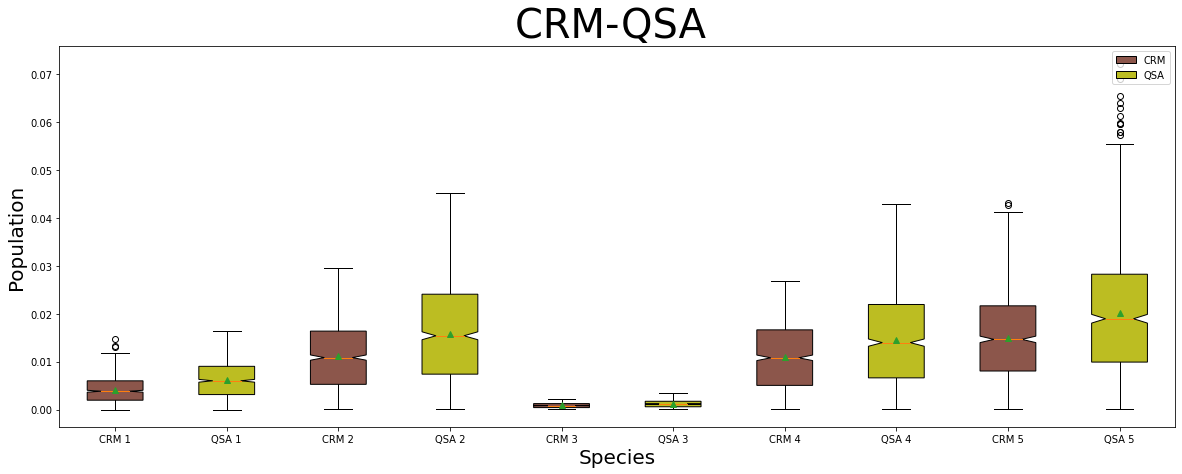

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
# population box-plots
b_CRM = ax.boxplot(CRM, positions=range(1,5*2,2), labels=["CRM "+str(i+1) for i in range(5)], patch_artist=True, showmeans=True,  notch=True, boxprops=dict(facecolor="C5"))
b_QSA = plt.boxplot(QSA, positions=range(2,5*2+1,2), labels=["QSA "+str(i+1) for i in range(5)], patch_artist=True, showmeans=True, notch=True, boxprops=dict(facecolor="C8"))
                    
ax.set_title("CRM-QSA ", fontsize=40)
ax.set_xlabel("Species", fontsize=20)
ax.set_ylabel("Population", fontsize=20)
ax.legend([b_CRM["boxes"][0], b_QSA["boxes"][0]], ['CRM', 'QSA'], loc='upper right')
plt.show()

------------------------------------------------------------------------------------------------------

set w = 0.1 for QSA model

In [10]:
# Set the number of species/variants in each layer
top_species = 5
middle_species = 5
resources = 5
death_rate = 1e-10
w = 0.1

# Set the statistics for the consumer-preference matrices
D_mean = 1
D_std_dev = 1

C_mean = 1
C_std_dev = 1

# Create the matrices and vectors featured in the differential equations

D = D_mean/middle_species + D_std_dev*np.random.normal(0, 1, (top_species,middle_species))/np.sqrt(middle_species)
C = C_mean/resources+C_std_dev*np.random.normal(0, 1, (middle_species,resources))/np.sqrt(resources)

u = np.random.uniform(0.5,1.5,top_species)
m = np.random.uniform(0.5,1.5,middle_species)
k = np.random.uniform(0.5,1.5,resources)

# This vector contains the information about X, N, and R by creating a long vector:
# (X, N, R)
initial_state = np.random.uniform(0,0.2,top_species+middle_species+resources)
# initial_state = np.ones(top_species+middle_species+resources)


# simulate time evolution
sol_QSA = solve_ivp(quasi_static, t_span=[0,100], y0=initial_state.copy(), args=(initial_state, np.array([death_rate]*5), w))

C:\Users\ADMIN\lib\site-packages\scipy\integrate\_ivp\common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


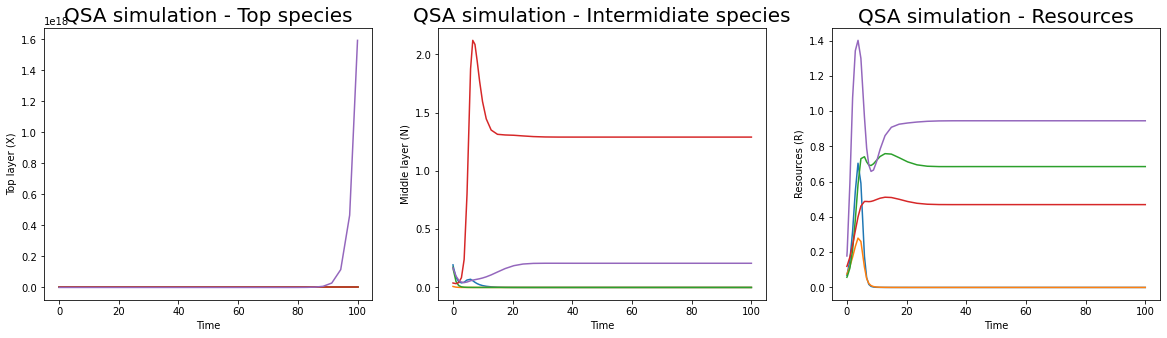

In [11]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

axs[0].plot(sol_QSA.t, sol_QSA.y[:top_species].T)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Top layer (X)')
axs[0].set_title("QSA simulation - Top species", fontsize=20)

axs[1].plot(sol_QSA.t, sol_QSA.y[top_species:top_species+middle_species].T)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Middle layer (N)')
axs[1].set_title("QSA simulation - Intermidiate species", fontsize=20)

axs[2].plot(sol_QSA.t, sol_QSA.y[top_species+middle_species:].T)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Resources (R)')
axs[2].set_title("QSA simulation - Resources", fontsize=20)

plt.show()

The quasi-stationary approximation works when w=0.1